<a href="https://colab.research.google.com/github/steph-exe/COVID19MapTeam5/blob/master/Covid_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the final program...

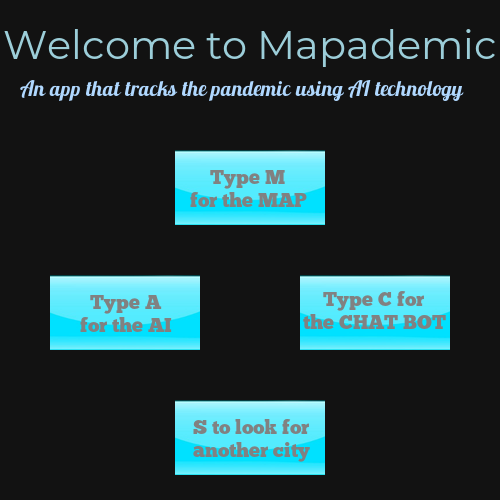

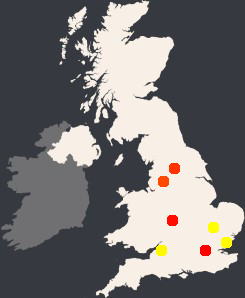

Click here to use the AI 
 https://console.cloud.google.com/automl-tables/locations/us-central1/datasets/TBL9124153207075897344;modelId=TBL8085716151687970816;task=basic/predict?project=covidcasemap
Click on ONLINE PREDICTION, then enter the city and date and click PREDICT!
Here's everything you need to know about this pandemic 
 https://integrations.eu-gb.assistant.watson.cloud.ibm.com/web/public/1a97dac4-5afe-4c14-9bca-3d6dc322fcbc
The number of confirmed cases in  london  are  24828


KeyboardInterrupt: ignored

In [0]:
def import_map(): #function to import map.jpg from google drive
  import urllib.request
  from PIL import Image
  map_url = "https://drive.google.com/uc?id=1_G-K4SZmQC5QHVkrDOQqtpOT0I4SfU0r" #map url
  mapimg = Image.open(urllib.request.urlopen(map_url)) 
  #display(mapimg) 
  return(mapimg)



def import_back(): #importing GUI background image
  import urllib.request
  from PIL import Image
  back_url = "https://drive.google.com/uc?id=12fXa9KMIUAvGXHBGZrJ3LCCUe3MIm_MH" #url for the background jpg
  back = Image.open(urllib.request.urlopen(back_url))
  display(back) #displey the GUI back image
  #return(back) 



def import_data(city_names): #Function to import data
  #import libraraies
  import pandas as pd
  import io
  import requests
  #live covid stats from UK gvt. 
  url = "https://coronavirus.data.gov.uk/downloads/csv/coronavirus-cases_latest.csv" #
  s = requests.get(url).content #get url of csv
  ds = pd.read_csv(io.StringIO(s.decode('utf-8'))) #read csv as a data frame
  data = ds.values.tolist() #convert data frame into a list (2d array)
  #print(data[777][7])

  cities = city_names
  cases = [0] * len(cities) 
  c = 0 #index for cities
  i = 0 #index for the next while loop
  while(c < len(cities)): #do the linear search for each city
    while((i <= 7319) and (data[i][0] != cities[c] )): #linear search for the city
      i = i + 1 #move on to the next row 
    #print(i) #print y value of city
    #print(data[i][5]) #print cases in that city
    cases[c] = data[i][7] #add cases to the array
    c = c + 1 #move on to the next city
  
  #print(cases) #print the number of cases in all the cities
  return(cases) #NOTE THIS IS AN ARRAY OF STRINGS 



def show_map(city_names, city_coords):
  from PIL import Image, ImageDraw #Import and display image
  image = import_map()
  draw = ImageDraw.Draw(image)

  def draw_circles(percent_cases, city_x, city_y, city_names): #Procedure to create heatmap on image, based on data
    centre_x = city_x #The coords of each city are the centre of the circle
    centre_y = city_y

    radius = 37 / len(city_names) #radius proportional to the number of cities displayed

    top_left = (centre_x - radius, centre_y - radius) #top lef point of the square, in which the circle is drawn in
    bottom_right = (centre_x + radius, centre_y + radius) #bottom right point...
    two_points = [top_left, bottom_right] #array of x,y of points of the square
    colour = round (1000 / (percent_cases ** 2))
    if(colour > 255):
      colour = 255
    #print ("colour:", colour)
    #print("x", centre_x)
    #print("y", centre_y)
    draw.ellipse(two_points, fill = (255, colour, 0,)) #draw the circle

  cases = import_data(city_names) #gets cases in an array AS A STRING
  for i in range(len(cases)): #converts the strings into ints
    cases[i] = int(cases[i])

  percent_cases = [0] * len(cases) #array to hold the percentage of cases
  for i in range(len(cases)):
    percent_cases[i] = (cases[i] * 100) / sum(cases) #case * 100 / total cases = the percentage of total cases

  #print(cases)
  #print(percent_cases)

  for i in range(len(city_names)): # draw the circle x times for x number of cities
    draw_circles(percent_cases[i], city_coords[i][0], city_coords[i][1], city_names) #draw the circles

  display(image)#show the final image



def any_city():
  #import libraraies
  import pandas as pd #import csv file
  import io #NOTE: can't use import_data() because it's case sensitive
  import requests
  #live covid stats from UK gvt. 
  url = "https://coronavirus.data.gov.uk/downloads/csv/coronavirus-cases_latest.csv" #
  s = requests.get(url).content #get url of csv
  ds = pd.read_csv(io.StringIO(s.decode('utf-8'))) #read csv as a data frame
  data = ds.values.tolist() #convert data frame into a list (2d array)

  city = input("Enter the name of the city you want to look up the cases of: ")
  city = city.lower().strip() #convert it to lowercase and remove white spaces
  found = False
  i = 0
  while((i < 7319) and (city != data[i][0].lower().strip())):
    i = i + 1
  if(data[i][0].lower().strip() != city):
    print("Please try another city")
    found = False
  else:
    found = True
  if(found):
    cases = data[i][7]
    print("The number of confirmed cases in ", city, " are ", cases)



def execution():
  #city names and city coordinates on a 245 * 298 map jpg image
  city_names = ["Manchester", "Bristol, City of", "London", "Southend-on-Sea", "Birmingham", "Leeds", "Cambridge"] #Mancehster, Bristol, London, Southend
  city_coords = [[164, 182], [162, 251], [206, 251], [227, 243], [173, 221], [175, 169], [214, 228]] #Manchester, Bristol, London, Southend

  #ai and chatbot urls
  AI_url = "https://console.cloud.google.com/automl-tables/locations/us-central1/datasets/TBL9124153207075897344;modelId=TBL8085716151687970816;task=basic/predict?project=covidcasemap"
  chat_url = "https://integrations.eu-gb.assistant.watson.cloud.ibm.com/web/public/1a97dac4-5afe-4c14-9bca-3d6dc322fcbc"

  mode = input().lower().strip() #mode: m = map, a = AI, c = chat bot
  if(mode == "m"): #if mode is m
    show_map(city_names, city_coords) #call map procedure

  if(mode == "c"):
    print("Here's everything you need to know about this pandemic \n", chat_url) #print chatbot url

  if(mode == "a"):
    print("Click here to use the AI \n", AI_url ) #print ai url
    print("Click on ONLINE PREDICTION, then enter the city and date and click PREDICT!")

  if(mode == "s"):
    any_city() 



#NOTE: google colab doesn't support webbrowser, so the urls had to stay bare
#there were problems with importing the AI model from google cloud with tensorflow
#google colab doesn't support any GUI libraries 



### MAIN PROGRAM ### 

import_back() #procedure to display the GUI background image
while(True): #then forever
  execution() #procedure to execute the program




All of this is test code...


In [0]:
#LINKS
#https://integrations.eu-gb.assistant.watson.cloud.ibm.com/web/public/1a97dac4-5afe-4c14-9bca-3d6dc322fcbc - chat bot
#https://console.cloud.google.com/automl-tables/locations/us-central1/datasets/TBL9124153207075897344;modelId=TBL8085716151687970816;task=basic/predict?project=covidcasemap - AI




TypeError: ignored

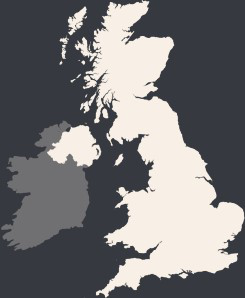

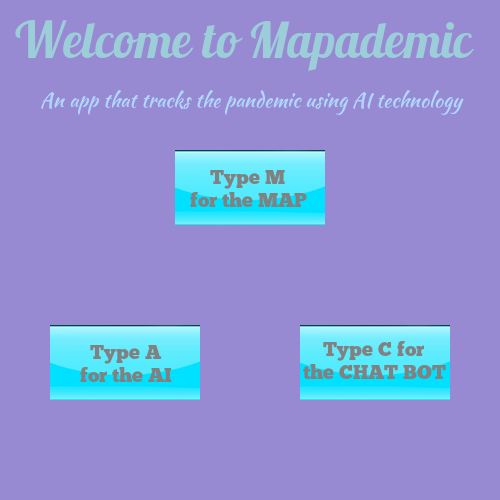

In [0]:
#uploading files
def import_map():
  import urllib.request
  from PIL import Image
  map_url = "https://drive.google.com/uc?id=1_G-K4SZmQC5QHVkrDOQqtpOT0I4SfU0r"
  mapimg = Image.open(urllib.request.urlopen(map_url))
  #display(mapimg) 
  return(mapimg)



def import_back():
  import urllib.request
  from PIL import Image
  back_url = "https://drive.google.com/uc?id=12fXa9KMIUAvGXHBGZrJ3LCCUe3MIm_MH"
  back = Image.open(urllib.request.urlopen(back_url))
  #display(back)
  return(back) 

mapimg = import_map()

back = import_back()

display(mapimg)

display(back) 


In [0]:
#csv import from url with pandas
#import libraraies
import pandas as pd
import io
import requests
#live covid stats from UK gvt. 
url = "https://coronavirus.data.gov.uk/downloads/csv/coronavirus-cases_latest.csv" #
s = requests.get(url).content #get url of csv
ds = pd.read_csv(io.StringIO(s.decode('utf-8'))) #read csv as a data frame
ds = ds.values.tolist() #convert data frame into a list (2d array)
print(ds[777][7])

1769


In [0]:
#another test
# TODO(developer): Uncomment and set the following variables
project_id = 'covidcasemap'
compute_region = 'us-central1'
model_display_name = 'COVID19Predictor'
# inputs = {'value': 3, ...}

from google.cloud import automl_v1beta1 as automl

client = automl.TablesClient(project=project_id, region=compute_region)

if feature_importance:
    response = client.predict(
        model_display_name=model_display_name,
        inputs=inputs,
        feature_importance=True,
    )
else:
    response = client.predict(
        model_display_name=model_display_name, inputs=inputs
    )

print("Prediction results:")
for result in response.payload:
    print(
        "Predicted class name: {}".format(result.tables.value.string_value)
    )
    print("Predicted class score: {}".format(result.tables.score))

    if feature_importance:
        # get features of top importance
        feat_list = [
            (column.feature_importance, column.column_display_name)
            for column in result.tables.tables_model_column_info
        ]
        feat_list.sort(reverse=True)
        if len(feat_list) < 10:
            feat_to_show = len(feat_list)
        else:
            feat_to_show = 10

        print("Features of top importance:")
        for feat in feat_list[:feat_to_show]:
            print(feat)

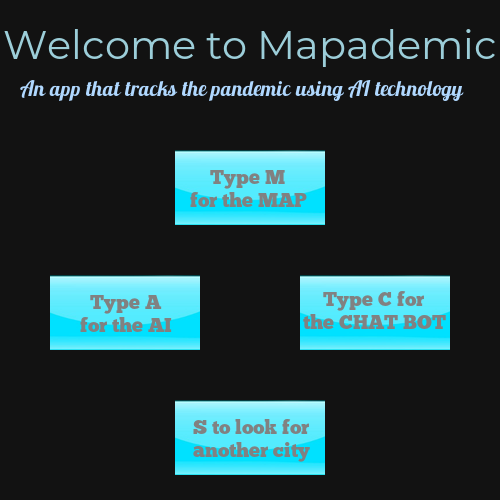

In [0]:
#GUI TEST
# Importing Image and ImageFont, ImageDraw module from PIL package  
from PIL import Image, ImageFont, ImageDraw 
      
# creating background and importing button
back = Image.new("RGB", (500, 500), color =(18, 18, 18))
button = Image.open("button.png")
button = button.resize((150, 75), Image.ANTIALIAS)

#pasting button on background
back.paste(button, (175, 150))
back.paste(button, (50, 275))
back.paste(button, (300, 275))
back.paste(button, (175, 400))

#being able to write text on background
draw = ImageDraw.Draw(back) 
  
#texts
text1 = "Welcome to Mapademic"
text2 = "An app that tracks the pandemic using AI technology"
text3 = "     Type M \n for the MAP"
text4 = "   Type A \n for the AI"
text5 = "     Type C for \n the CHAT BOT"
text6 = "      S to look for \n      another city"

#fonts for texts
font = ImageFont.truetype(r"Lobster font.otf", 21) 
font2 = ImageFont.truetype(r"Kaushan font.otf", 20)
font3 = ImageFont.truetype(r"Chunk5 font.otf", 20)
roboto = ImageFont.truetype("RobotoCondensed-Regular.ttf", 50)
lato = ImageFont.truetype("Lato-Regular.ttf", 50)
sans = ImageFont.truetype("OpenSans-Regular.ttf", 50)
mont = ImageFont.truetype("Montserrat-Regular.otf", 40)

#writing text on backgound using draw
draw.text((3, 20), text1, fill = (156, 206, 217), font = mont) 
draw.text((20, 80), text2, fill = (176, 216, 327), font = font)
draw.text((185, 165), text3, fill = (129,129,129), font = font3) #+45, + 30
draw.text((75, 290), text4, fill = (129, 129, 129), font = font3)
draw.text((298, 287), text5, fill = (129, 129, 129), font = font3)
draw.text((163, 415), text6, fill = (129, 129, 129), font = font3)

display(back)





In [0]:
%%bash

# Execute this cell on Ubuntu only
if grep -e "ID=ubuntu" /etc/os-release ; then \
    echo 'Continue on Ubuntu' ; \
else \
    echo 'Does not look like an Ubuntu box, exiting' ; \
    exit ; \
fi

# Check if the software is already installed
if dpkg -l python3-pymoebinv > /dev/null ; then \
    echo 'The package is already installed, exiting' ; \
    exit ; \
fi

# Install signature key of the Ubuntu repository
curl -L https://sourceforge.net/projects/moebinv/files/binary/ubuntu/moebinv.gpg.key | apt-key add - 

# Add Ubuntu repository to known sources
echo 'deb https://sourceforge.net/projects/moebinv/files/binary/ubuntu bionic main' > \
     /etc/apt/sources.list.d/moebinv-bionic.list 

# Update the contents of the repository
apt update 

# Install required packages and their dependencies
apt-get  -q -y install asymptote python3-pymoebinv

# Copy useful initialisation file to the current directory
zcat /usr/share/doc/python3-pymoebinv/EPAL-v1/init_cycle.py.gz > init_cycle.py

ID=ubuntu
Continue on Ubuntu
OK
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [91.7 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:13 http://archive.ubuntu.com

dpkg-query: no packages found matching python3-pymoebinv
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: apt-key output should not be parsed (stdout is not a terminal)
100 21153  100 21153    0     0  43795      0 --:--:-- --:--:-- --:--:-- 43704
100 21140  100 21140    0     0  35174      0 --:--:-- --:--:-- --:--:-- 35174
100 21216  100 21216    0     0  24555      0 --:--:-- --:--:-- --:--:-- 24555
100   337  100   337    0     0    272      0  0:00:01  0:00:01 --:--:--  1893
100  2460  100  2460    0     0   1521      0  0:00:01  0:00:01 --:--:--  1521




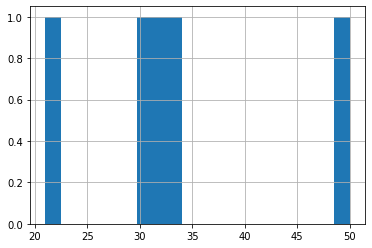

In [0]:
#TEST AI WITH TENSOR FLOW
# https://www.youtube.com/watch?v=FWOZmmIUqHg&list=PLFhlNJVHUn9V9DBnJGt6h1LBhHDBeEx54&index=2&t=0s
import pandas as pd
diabetes = pd.read_csv("AI_Test.csv")
#diabetes.head()
diabetes.columns
cols_to_norm = ["Numer_pregnant", "Glucose_concentration", "Blood pressure", "Triceps", "Insulin", "BMI", "Pedigree"]
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
diabetes.head()

import tensorflow as tf 
num_preg = tf.feature_column.numeric_column("Numer_pregnant")
plasma_gluc = tf.feature_column.numeric_column("Glucose_concentration")
dias_press = tf.feature_column.numeric_column("Blood pressure")
tricep = tf.feature_column.numeric_column("Triceps")
insulin = tf.feature_column.numeric_column("Insulin")
bmi = tf.feature_column.numeric_column("BMI")
diabetes_peigree = tf.feature_column.numeric_column("Pedigree")
age = tf.feature_column.numeric_column("Age")

assigned_group = tf.feature_column.sequence_categorical_column_with_vocabulary_list("Group", ["A", "B", "C", "D"])
import matplotlib.pyplot as plt 
%matplotlib inline 
diabetes["Age"].hist(bins = 20)


In [0]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

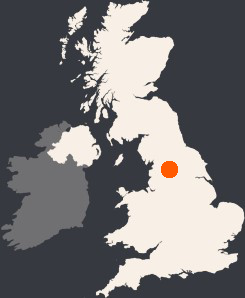

In [0]:
def draw_circles(cases, city_x, city_y):
  from PIL import Image, ImageDraw
  image = Image.open("map.jpg")
  draw = ImageDraw.Draw(image)

  centre_x = city_x
  centre_y = city_y
  radius = round(cases / 100) 
  top_left = (centre_x - radius, centre_y - radius)
  bottom_right = (centre_x + radius, centre_y + radius)
  two_points = [top_left, bottom_right]

  draw.ellipse(two_points, fill = (255, 90, 0, 255))

  display(image)

cases = 769
city_x = 169
city_y = 169

draw_circles(cases, city_x, city_y) 




In [0]:
#this one works
import csv
from datetime import date, timedelta

yesterday_unformatted = date.today() - timedelta(days = 2)
yesterday = yesterday_unformatted.strftime("%Y-%m-%d")

file = open("coronavirus-cases_latest.csv")
csv_file = csv.reader(file)

data_needed = []

for row in csv_file:
  if (row[0] == "Manchester" or row[0] == "London" or row[0] == "Bristol, City of") and (row[3] == yesterday):
      holder = [row[0],row[5]]
      data_needed.append(holder)

print(data_needed)


[]


In [0]:
  #ONE STEP CLOSER -- DO NOT EDIT 
  import csv
  import pandas as pd
  df = pd.read_csv (r"coronavirus-cases_latest.csv")
  #print (df)

with open("coronavirus-cases_latest.csv") as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    data = [row for row in csv.reader(csvDataFile)]
    #for row in csvReader:
    #print(data[1][0]) #data[y][x] #testing with York

    cities = ["London", "Manchester", "Bristol, City of", "Southend-on-Sea"]
    cases = [0] * len(cities) 
    c = 0 #index for cities
    i = 0 #index for the next while loop
    while(c < len(cities)):
      while((i <= 7319) and (data[i][0] != cities[c] )):
        i = i + 1 #move on to the next row 
      #print(i) #print y value of city
      #print(data[i][5]) #print cases in that city
      cases[c] = data[i][5] #add cases to the array
      c = c + 1 #move on to the next city
  
    print(cases) #print the number of cases in all the cities


23341
975
553
275
['23341', '975', '553', '275']


In [0]:
#Bhavy, here i'm gonna try something idk if it will work

import csv

file = open("coronavirus-cases_latest.csv")
csv_file = csv.reader(file)

for row in csv_file:
  print(row)



Streaming output truncated to the last 5000 lines.
['Calderdale', 'E08000033', 'Upper tier local authority', '04/10/20', '11', '139']
['Bury', 'E08000002', 'Upper tier local authority', '04/10/20', '16', '233']
['Buckinghamshire', 'E10000002', 'Upper tier local authority', '04/10/20', '26', '499']
['Bromley', 'E09000006', 'Upper tier local authority', '04/10/20', '23', '757']
['Bristol, City of', 'E06000023', 'Upper tier local authority', '04/10/20', '18', '324']
['Brighton and Hove', 'E06000043', 'Upper tier local authority', '04/10/20', '11', '222']
['Brent', 'E09000005', 'Upper tier local authority', '04/10/20', '40', '1018']
['Bradford', 'E08000032', 'Upper tier local authority', '04/10/20', '18', '414']
['Bracknell Forest', 'E06000036', 'Upper tier local authority', '04/10/20', '4', '111']
['Bournemouth, Christchurch and Poole', 'E06000058', 'Upper tier local authority', '04/10/20', '22', '226']
['Bolton', 'E08000001', 'Upper tier local authority', '04/10/20', '28', '377']
['Black